## Solicitação de cartão de crédito

## 1.Definindo Problema
<p> Os bancos recebem <em>muitas<em> solicitações de cartão de crédito. Os bancos têm a sua disposição várias características dos clientes que os ajudam a tomar uma decisção em relação a se devem ou não aceitar a solicitação. Dado ao grande volume de dados, é caro e demorado analisar esses dados manualmente. Dado essa problemática, nosso objetivo é otimizar essa atividade: Prever a aprovação de cartão de crédito para determinado cliente usando técnicas de machine learning.<p>
<p> Para isso usamos o <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> tirado do repositório de Machine Learning da UCI.<p>

## 2.Planejamento de solução
<p><p>
<li>Carregar os dados e observamos os dados, procurando por inconsistências, tipos de dados diferentes do que os desejados, dados faltando e faixa de valores diferentes entre as variáveis<p>
<li> Dividir os dados em dados de treino e dados de teste. Esse passo deve ser feito antes do pré processamento, pois os dados de teste não devem influenciar os valores preenchidos dos dados de treino. Por exemplos: Se vamos preencher valores faltando com a média da coluna, é importante que essa média seja calculada usando somenteo os dados de treino. Dessa forma, nenhuma informação dos dados de testes passarão pelo algoritmo de machine learning durante o treino, e o teste será mais fiel, e estará sendo realizados por dados nunca vistos antes pelo código, mesmo que seja através de médias ou outros agregadores.
<li>Pré-processar os dados. Mudar os dtypes necessários, preencher os dados faltando, ou eliminar colunas/linhas desnecessárias<p>
<li>Com os dados bem tratados, fazer uma análise exploratória dos dados, plotando gráficos e tabelas para ganhar intuição a cerca dos dados e do problema <p>
<li>Aplicar algoritmo de machine learning para determinar se um cliente terá seu cartão aprovado com base nos seus atributos<p>    

## 3.Carregando e limpando os dados

In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [5]:
caminho = r'C:\Users\fisicamedica.LIGA\OneDrive - LIGA\Área de Trabalho\Mateus\credit-card-ml-master\cc_approvals.data'
cc_apps = pd.read_csv(caminho, header = None)
cc_apps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


<font size="3"><p>Os dados não são muito intuitivos, não existe indicação para as colunas. Como os dados são clientes reais de bancos, provavelmente foram anonimizados. Porém, <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">nesse blog</a> encontramos dicas do que as variáveis podem significar. Usaremos essas dicas como referência para renomear os dados e entender o que significa cada valor categórico.<p>

<font size="3"><p>Referencia para nome das variáveis:<p>

In [6]:
# As 15 primeiras colunas são os atributos que determinam se um cliente terá ou não seu cartão aprovado. 
# Enquanto a última coluna é a variável que indica se o cartão foi ou não aprovado para o cliente representado em cada linha.
colunas = ['sexo','idade','divida','casado','cliente_banco','educ_nivel','raça','anos_empregado','divida_anterior','empregado',
          'score','carteira_motorista','cidadania','zip','renda','aprovado']
cc_apps.columns = colunas
cc_apps.head()

,sexo,idade,divida,casado,cliente_banco,educ_nivel,raça,anos_empregado,divida_anterior,empregado,score,carteira_motorista,cidadania,zip,renda,aprovado
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [7]:
# Descrição dos atributos numéricos
cc_apps.describe()

,divida,anos_empregado,score,renda
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [8]:
# Aqui dividimos os dados, de forma aleatória, com 33% para teste e o restante para treino. random_state=42 garante que o sorteio
# só seja feito na primeira vez que rodamos o código, garantindo consistência.
from sklearn.model_selection import train_test_split

cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

In [9]:
# Para investigar as colunas que possuem valores faltando, vamos observar primeiro os tipos dos dados
# Se uma coluna numérica está com o tipo 'object', pode ser indicação de que tem algum valor na coluna que impediu 
# o pandas de identificar aquela coluna como numérica. Por exemplo, uma linha com valor "sem medida", '?', '---'

# Verificando os tipos dos dados
cc_apps_train.info()

# Sexo e idade são colunas com valores numéricos, mas que o panda identificou como string
print(cc_apps_train['sexo'].value_counts())
print(cc_apps_train['idade'].value_counts())

# Podemos perceber que valores faltando são representados por '?', substituimos '?' pelo valor np.nan, que possui funções próprias para lidar com ele
# Precisamos então definir uma estratégia para substituir valores em cada coluna

cc_apps_train = cc_apps_train.replace('?', np.nan)
cc_apps_test = cc_apps_test.replace('?', np.nan)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 382 to 102
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sexo                462 non-null    object 
 1   idade               462 non-null    object 
 2   divida              462 non-null    float64
 3   casado              462 non-null    object 
 4   cliente_banco       462 non-null    object 
 5   educ_nivel          462 non-null    object 
 6   raça                462 non-null    object 
 7   anos_empregado      462 non-null    float64
 8   divida_anterior     462 non-null    object 
 9   empregado           462 non-null    object 
 10  score               462 non-null    int64  
 11  carteira_motorista  462 non-null    object 
 12  cidadania           462 non-null    object 
 13  zip                 462 non-null    object 
 14  renda               462 non-null    int64  
 15  aprovado            462 non-null    object 
dtypes: flo

In [10]:
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

sexo                   8
idade                  5
divida                 0
casado                 6
cliente_banco          6
educ_nivel             7
raça                   7
anos_empregado         0
divida_anterior        0
empregado              0
score                  0
carteira_motorista     0
cidadania              0
zip                   12
renda                  0
aprovado               0
dtype: int64
sexo                  4
idade                 7
divida                0
casado                0
cliente_banco         0
educ_nivel            2
raça                  2
anos_empregado        0
divida_anterior       0
empregado             0
score                 0
carteira_motorista    0
cidadania             0
zip                   1
renda                 0
aprovado              0
dtype: int64


In [11]:
# Antes de substituir os valores, devemos transformar os dados que são númericos mas estão com dtype object

cc_apps_train.loc[:, 'idade'] = pd.to_numeric(cc_apps_train['idade'])
cc_apps_test.loc[:, 'idade'] = pd.to_numeric(cc_apps_test['idade'])

cc_apps_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 382 to 102
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sexo                454 non-null    object 
 1   idade               457 non-null    float64
 2   divida              462 non-null    float64
 3   casado              456 non-null    object 
 4   cliente_banco       456 non-null    object 
 5   educ_nivel          455 non-null    object 
 6   raça                455 non-null    object 
 7   anos_empregado      462 non-null    float64
 8   divida_anterior     462 non-null    object 
 9   empregado           462 non-null    object 
 10  score               462 non-null    int64  
 11  carteira_motorista  462 non-null    object 
 12  cidadania           462 non-null    object 
 13  zip                 450 non-null    object 
 14  renda               462 non-null    int64  
 15  aprovado            462 non-null    object 
dtypes: flo

In [12]:
# Dados numéricos serão substituidos pela média na coluna
cc_apps_train.mean()

# Os dados de teste precisam ser substituidos pela média dos dados de treino, já que lá temos mais dados
# e uma representação melhor da distribuição.
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_train.mean(), inplace=True)

cc_apps_train.isna().sum()

# Todos os dados faltando preencher  são categoricos, e nossa estratégia deve ser outra, já que não da pra calcular a média
# vamos calcular o valor mais comum em cada coluna e usar ele pra preencher os valores faltando

sexo                   8
idade                  0
divida                 0
casado                 6
cliente_banco          6
educ_nivel             7
raça                   7
anos_empregado         0
divida_anterior        0
empregado              0
score                  0
carteira_motorista     0
cidadania              0
zip                   12
renda                  0
aprovado               0
dtype: int64

In [13]:
# Iteramos por cada coluna, e se o tipo for object, substituimos valores faltando pelo valor mais comum usando value_counts
for col in cc_apps_train:
    if cc_apps_train[col].dtype == 'object':
        # a cada ciclo vamos substituir os valores de uma coluna
        # o resultado vai ser o dataframe inteiro onde SÓ AQUELA COLUNA não tem 
        # mais os valores vazios que tinha antes
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].value_counts().index[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_train[col].value_counts().index[0])

# verifica o resultado
print(cc_apps_train.isna().sum())
print(cc_apps_test.isna().sum())

# Agora que  não temos mais valores faltando, podemos cuidar dos dados categoricos

sexo                  0
idade                 0
divida                0
casado                0
cliente_banco         0
educ_nivel            0
raça                  0
anos_empregado        0
divida_anterior       0
empregado             0
score                 0
carteira_motorista    0
cidadania             0
zip                   0
renda                 0
aprovado              0
dtype: int64
sexo                  0
idade                 0
divida                0
casado                0
cliente_banco         0
educ_nivel            0
raça                  0
anos_empregado        0
divida_anterior       0
empregado             0
score                 0
carteira_motorista    0
cidadania             0
zip                   0
renda                 0
aprovado              0
dtype: int64


## 4. Análise Exploratória

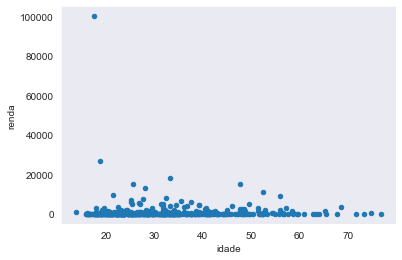

<AxesSubplot:xlabel='idade', ylabel='renda'>

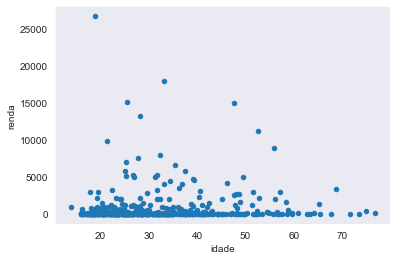

In [242]:
# Antes de poder analisar os dados precisamos transformar os dados na coluna 'aprovado', substituindo '+' por 1 e '-' por 0
cc_apps_train.loc[cc_apps_train['aprovado'] == '+', 'aprovado'] = 1
cc_apps_train.loc[cc_apps_train['aprovado'] == '-', 'aprovado'] = 0

cc_apps_train.plot(kind = 'scatter', x = 'idade', y = 'renda')
plt.show()

# Esse gráfico indica que temos um outliar de rendas próximo aos 20 anos, vamos remover esse valor para que ele não atrapalhe
# as estatísticas e a vizualização dos dados

cc_apps_novo = cc_apps_train[cc_apps_train['renda'] < 40000]
cc_apps_novo.plot(kind = 'scatter', x = 'idade', y = 'renda')

C:\Users\fisicamedica.LIGA\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


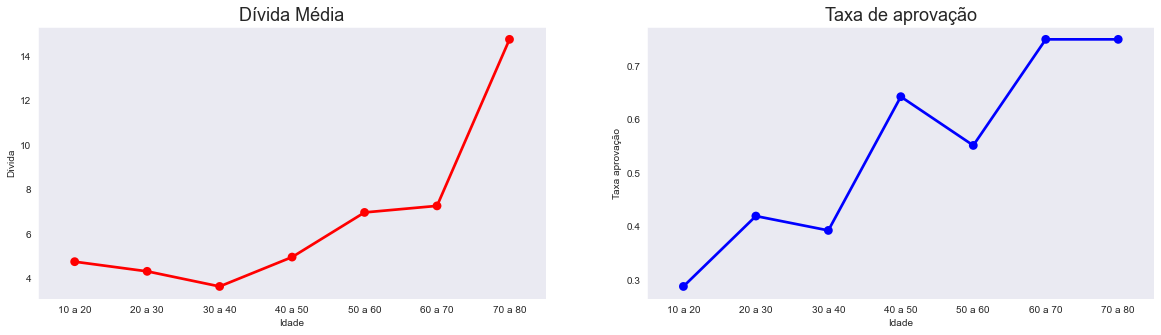

In [254]:
# Criando uma coluna com categoria range de idade e depois calculando estatisticas agregadoras para
# cada range.
cc_apps_novo.loc[:,'range_idade'] = pd.cut(cc_apps_novo['idade'], [10,20,30,40,50,60,70,80])
cc_apps_novo.loc[:,'aprovado'] = pd.to_numeric(cc_apps_novo['aprovado'])

# Criando um data frame para armazenar o as estatísticas relacionadas ao intervalo de idades
range_idade = pd.DataFrame()
range_idade = cc_apps_novo.groupby('range_idade').mean('divida').reset_index()
range_idade['numero_solicitacoes'] = cc_apps_novo.groupby('range_idade').count()['idade'].values
range_idade.loc[:,'range_idade'] = ['10 a 20', '20 a 30', '30 a 40', '40 a 50', '50 a 60', '60 a 70', '70 a 80']

# Relação entre entre a idade dos clientes e a divida que eles possuem
sns.set_style("dark")
fig, ax = plt.subplots(1,2,figsize = (20,5))
sns.pointplot(data = range_idade, x = 'range_idade', y = 'divida', ax = ax[0], color = 'r')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Dívida')
ax[0].set_title('Dívida Média', fontsize = 18)

# Relação entre entre a idade dos clientes e a divida que eles possuem
sns.pointplot(data = range_idade, x = 'range_idade', y = 'aprovado', ax = ax[1], color = 'b')
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Taxa aprovação')
ax[1].set_title('Taxa de aprovação', fontsize = 18)


plt.show()

<font size = "4"><p>Podemos concluir a partir dos gráficos:<p>
<li>Existe uma relação positiva entre a dívida e a idade, quanto mais velhas, mais endividadas as pessoas ficam
<li>A taxa de aprovação do cartão de crédito aumenta com a idade. O que pode indicar uma relação entre a dívida e a taxa
    de aprovação

## Analisando como as variáveis numéricas se relacionam

In [299]:
# Separando variáveis numéricas
var_numericas = [col for col in cc_apps_train.columns if cc_apps_train[col].dtype == 'int64' 
                 or cc_apps_train[col].dtype == 'float']
var_numericas.remove('aprovado')


# Removendo outliers
cc_apps_train = cc_apps_train[cc_apps_train['renda'] < 40000]
cc_apps_train = cc_apps_train[cc_apps_train['score'] < 60]

In [330]:
cc_apps_train.groupby('aprovado').median()['divida']

aprovado
0    2.25
1    4.46
Name: divida, dtype: float64

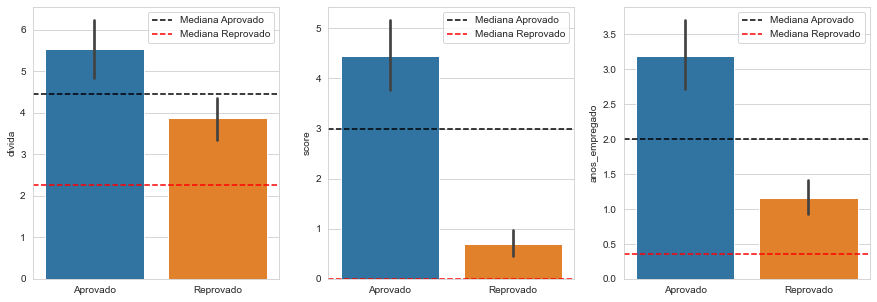

In [347]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.barplot(data = cc_apps_train, x = 'aprovado', y = 'divida', ax = ax[0], order = [1, 0])
ax[0].set_xticklabels(['Aprovado', 'Reprovado'])
ax[0].set_xlabel('')
ax[0].axhline(cc_apps_train.groupby('aprovado').median()['divida'][1],ls = '--', color = 'black', label = 'Mediana Aprovado')
ax[0].axhline(cc_apps_train.groupby('aprovado').median()['divida'][0],ls = '--', color = 'red', label = 'Mediana Reprovado')
ax[0].legend()

sns.barplot(data = cc_apps_train, x = 'aprovado', y = 'score', ax = ax[1], order = [1, 0])
ax[1].set_xticklabels(['Aprovado', 'Reprovado'])
ax[1].set_xlabel('')
ax[1].axhline(cc_apps_train.groupby('aprovado').median()['score'][1],ls = '--', color = 'black', label = 'Mediana Aprovado')
ax[1].axhline(cc_apps_train.groupby('aprovado').median()['score'][0],ls = '--', color = 'red', label = 'Mediana Reprovado')
ax[1].legend()

sns.barplot(data = cc_apps_train, x = 'aprovado', y = 'anos_empregado', ax = ax[2], order = [1, 0])
ax[2].set_xticklabels(['Aprovado', 'Reprovado'])
ax[2].set_xlabel('')
ax[2].axhline(cc_apps_train.groupby('aprovado').median()['anos_empregado'][1],ls = '--', color = 'black', label = 'Mediana Aprovado')
ax[2].axhline(cc_apps_train.groupby('aprovado').median()['anos_empregado'][0],ls = '--', color = 'red', label = 'Mediana Reprovado')
ax[2].legend()



plt.show()

<font size = "3"><p> Pelos gráficos podemos observar que as médias de dívida, score e anos empregados são maiores para clientes que tiveram a solicitação aprovada. Os valores das medianas indicam que existem valores "puxando" a média para cima, mas nada que discarte a relação geral apresentada no gráfico.<p>
<p>Podemos concluir a partir dos gráficos: <p>
<li> Clientes com divida maior têm maior probabilidade de ter a solicitação de cartão de crédito aprovada
<li> Existe uma grande diferença no score entre os clientes que tiveram a solicitação aprovada e os que não tiveram, aqueles com maior score têm probabilidade maior de ter a solicitação aprovada
<li> Clientes que estão empregados a mais tempo têm mais chance de ter a solicitação aprovada


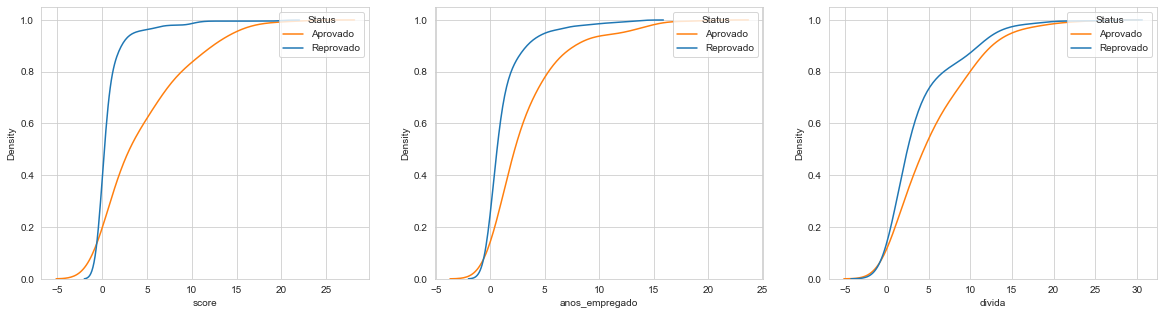

In [382]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,3,figsize = (20,5))

sns.kdeplot(data = cc_apps_train, x = 'score', ax = ax[0], hue = 'aprovado', legend = False,
            cumulative=True, 
            common_norm=False,
            common_grid=False)
ax[0].legend(title='Status', loc='upper right', labels=['Aprovado', 'Reprovado'])


sns.kdeplot(data = cc_apps_train, x = 'anos_empregado', ax = ax[1], hue = 'aprovado', legend = False,
            cumulative=True, 
            common_norm=False,
            common_grid=False)
ax[1].legend(title='Status', loc='upper right', labels=['Aprovado', 'Reprovado'])


sns.kdeplot(data = cc_apps_train, x = 'divida', ax = ax[2], hue = 'aprovado', legend = False, 
            cumulative=True, 
            common_norm=False,
            common_grid=False)
ax[2].legend(title='Status', loc='upper right', labels=['Aprovado', 'Reprovado'])


### Os gráficos acima são CDF, distribuição de densidade cumulativas.  A densidade representa a razão dos valores que estão abaixo de determinado valor no eixo x. 

## 5. Pré Processamento dos dados
<p> Agora, antes de alimentar o modelo de machine learning com os dados, precisamos codificar os dados categóricos, de forma
 que eles sejam lidos mais facilmente pelo algoritmo e normalizar os valores, para que colunas diferentes não tenha uma faixa muito diferente de valores <p>

In [18]:
# Convertemos os dados categoricos em numérico. Como estamos convertendo os dados de treino e de teste separadamente
# Nesse método, cada categoria terá uma coluna a representando. Dessa forma precisamos garantir que os dados de teste
# e de treino tenham a mesma coluna, caso exista alguma categoria nos dados de treino que não estão nos dados de teste

cc_apps_train_ml = pd.get_dummies(cc_apps_train)
cc_apps_test_ml = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set, se uma categoria não estiver presente, a coluna toda será
# preenchidas com 0.
cc_apps_test_ml = cc_apps_test_ml.reindex(columns= cc_apps_train_ml.columns, fill_value=0)

In [19]:
# Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

# Separando atributos e a saída em arrays diferentes
# também transformamos os dados em np.arrays
X_train, y_train = cc_apps_train_ml.iloc[:,:-1].values, cc_apps_train_ml.iloc[:,[-1]].values
X_test, y_test = cc_apps_test_ml.iloc[:,:-1].values, cc_apps_test_ml.iloc[:,[-1]].values

# Usamos fit_transform para dados de treinos e transform para os dados de teste. 
# O transform nos dados de treino é necessário para que a gente use os mesmos parámetros usados
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## 5. Aplicando o modelo de regressão logistica
<p> Nosso objetivo é prever se um dado cliente terá sua solicitação aprovada ou não, ou melhor, decidir se determinado cliente deve ter a solicitação aprovada, de acordo com os padrões dos dados fornecidos.<p>
<p> Sendo assim, temos um problema de classificação, onde cada cliente será classificado como aprovado (1) ou não aprovado (0)<p>
<p> O modelo de regressão logistica calcula a probabilidade de uma certa medida ser atribuida a uma classe. O nosso modelo 
atribuirá àquela medida a classe que possuir maior probabilidade.<p>

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(rescaledX_train, y_train.ravel())

LogisticRegression()

In [21]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(rescaledX_test)

print("Acurácia do modelo:: ", logreg.score(rescaledX_test, y_test))

# A primeira linha são os Positivos verdadeiros e falsos positivos
# a segunda linha os falsos negativos e negativos positivos
print(confusion_matrix(y_test, y_pred))

Acurácia do modelo::  0.0
[[  0 228]
 [  0   0]]
